In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import sys
from astropy.io import fits
from glob import glob
from hydra import initialize, compose
from pprint import pprint

# set paths to various directories based on the machine this code is being executed on
try:
    with initialize(version_base=None, config_path='config'):
        config = compose(config_name='config.yaml')  # overrides=['machine=uzay']
except:
    with initialize(version_base=None, config_path='../../config'):
        config = compose(config_name='config.yaml')  # overrides=['machine=uzay']

array_dir, data_dir, figure_dir, pickle_dir, repo_dir = config.machine.array_dir, config.machine.data_dir, config.machine.figure_dir, config.machine.pickle_dir, config.machine.repo_dir

# enable use of local modules
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

# set matplotlib style
plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

from mejiro.plots import plot
from mejiro.utils import util

In [2]:
pipeline_params = util.hydra_to_dict(config.pipeline)
debugging = pipeline_params['debugging']
if debugging:
    pipeline_dir = f'{config.machine.pipeline_dir}_dev'
else:
    pipeline_dir = config.machine.pipeline_dir

output_dir = os.path.join(data_dir, 'fits_export')
all_fits_files = glob(f'{output_dir}/*.fits')
print(f'{len(all_fits_files)} fits files found in {output_dir}')

14706 fits files found in /data/bwedig/mejiro/fits_export


In [3]:
fits_path = random.choice(all_fits_files)
print(f'Randomly selected fits file: {fits_path}')

Randomly selected fits file: /data/bwedig/mejiro/fits_export/roman_hlwas_strong_lens_00008608.fits


In [4]:
fits.info(fits_path)

Filename: /data/bwedig/mejiro/fits_export/roman_hlwas_strong_lens_00008608.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      24   ()      
  1  F087          1 ImageHDU        20   (91, 91)   float32   
  2  F106          1 ImageHDU        20   (91, 91)   float32   
  3  F129          1 ImageHDU        20   (91, 91)   float32   
  4  F158          1 ImageHDU        20   (91, 91)   float32   
  5  F184          1 ImageHDU        20   (91, 91)   float32   


In [5]:
for i in range(6):
    pprint(fits.getheader(fits_path, ext=i))
    print('\n')

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
VERSION = '0.0.1   '           / mejiro version                                 
AUTHOR  = 'bwedig@tiberius.physics.wustl.edu' / username@host for calculation   
CREATED = '2024_11_11-05_59_22_PM'                                              
UID     = '00008608'           / UID for system assigned by mejiro              
ZSOURCE =   0.7698774387111089 / Source galaxy redshift                         
ZLENS   =   0.2155926094355461 / Lens galaxy redshift                           
DS      =   2.7827488847602977 / Comoving distance to source galaxy [Gpc]       
DL      =   0.9056942109026235 / Comoving distance to lens galaxy [Gpc]         
DLS     =   1.87705467385767

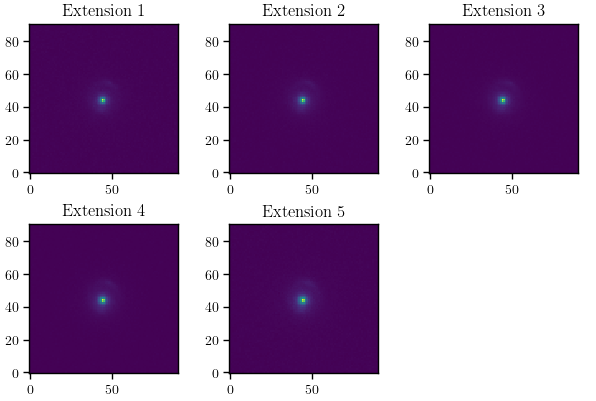

In [6]:
data = []

for i in range(1, 6):
    data.append(fits.getdata(fits_path, ext=i))

fig, axs = plt.subplots(2, 3, figsize=(6, 4), constrained_layout=True)
for i, ax in enumerate(axs.flat):
    if i == 5:
        ax.axis('off')
        continue
    ax.imshow(data[i])
    ax.set_title(f'Extension {i + 1}')
plt.show()